# Modeling Exercises

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

import wrangle

import itertools

import warnings
warnings.filterwarnings('ignore')

## Get Data

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Prepare data

### Let's fix the column names by making everything lower case and replacing the dot separator with and underscore

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


## Modeling

### Create and Fit cluster model

In [5]:
# create the sklearn object
# kmeans as a variable holds the KMeans object with K=3
kmeans = KMeans(n_clusters=3)
# fit the object on our X
kmeans.fit(X)
# use the object to predict the clusters
clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
# we see a very similar output using kmeans.labels_
# as an attribute of the Object (at least on the data set that 
# the model was trained on)
# kmeans.labels_

### Add cluster to our original data

In [7]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


### Visualize Clusters

In [8]:
# aggregate based on species,
# grab the mean of all data fields
# peep the cluster values
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.96
virginica,6.588,2.974,5.552,2.026,1.08


In [9]:
# what does pandas.DataFrame.groupby() output?

In [10]:
df[df.species == 'setosa']
df[df.species == 'virginica']
df[df.species == 'versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
51,7.0,3.2,4.7,1.4,versicolor,2
52,6.4,3.2,4.5,1.5,versicolor,2
53,6.9,3.1,4.9,1.5,versicolor,2
54,5.5,2.3,4.0,1.3,versicolor,2
55,6.5,2.8,4.6,1.5,versicolor,2
56,5.7,2.8,4.5,1.3,versicolor,2
57,6.3,3.3,4.7,1.6,versicolor,2
58,4.9,2.4,3.3,1.0,versicolor,2
59,6.6,2.9,4.6,1.3,versicolor,2
60,5.2,2.7,3.9,1.4,versicolor,2


In [11]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.96
virginica,6.588,2.974,5.552,2.026,1.08


In [12]:
# name will be the species (like 'setosa')
# subset will be the filtered dataframe (like df[df.species == 'setosa'])
# for name, subset in df.groupby('species'):
#     print(name)
#     print('========')
#     print(subset)
#     print('========')
#     print('end iteration')

In [13]:
df.cluster.sort_values().unique()

array([0, 1, 2], dtype=int32)

[Text(0.5, 1.0, 'K-Means Clusters')]

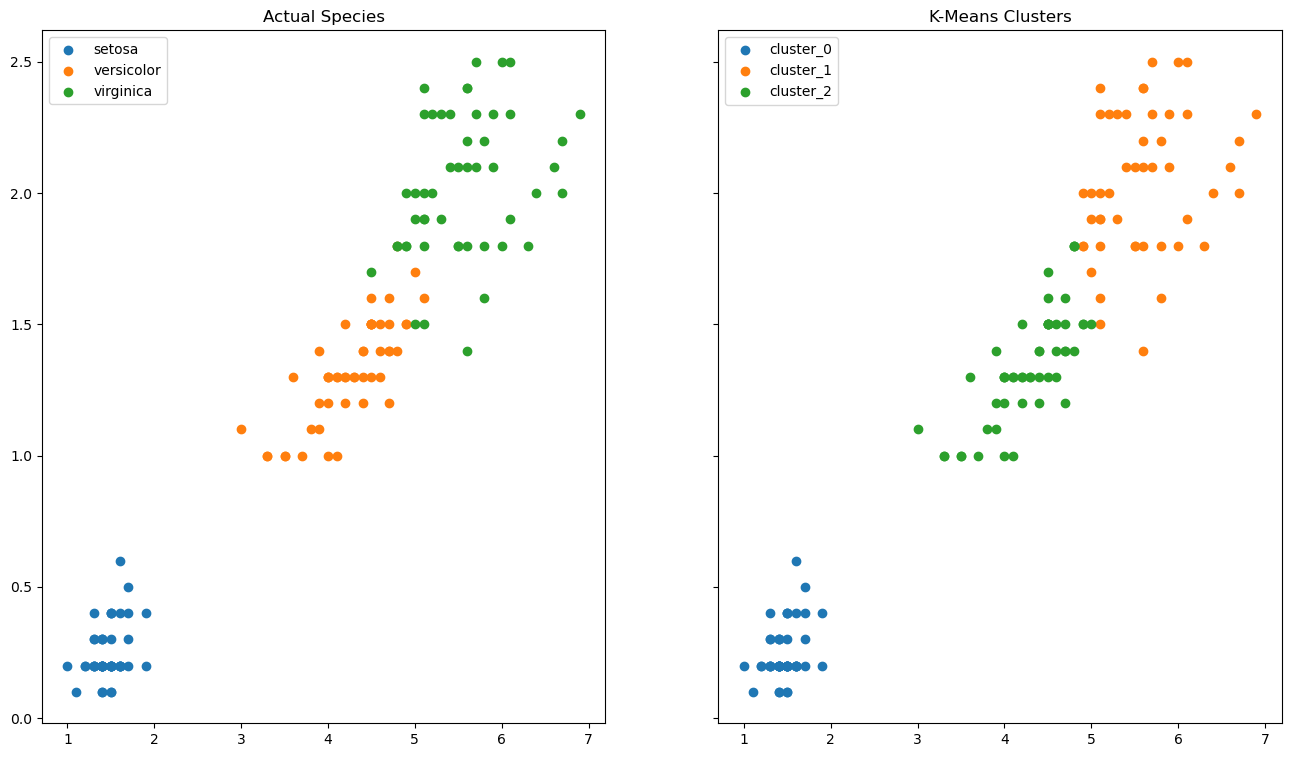

In [14]:
fig, axs = plt.subplots(1, 2, 
                        figsize=(16, 9), 
                        sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(
        subset.petal_length, 
        subset.petal_width, 
        label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(
        df[df.cluster == cluster_n].petal_length, 
        df[df.cluster == cluster_n].petal_width, 
        label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Use elbow method to determine cluster number

Text(0.5, 1.0, 'Change in inertia as k increases')

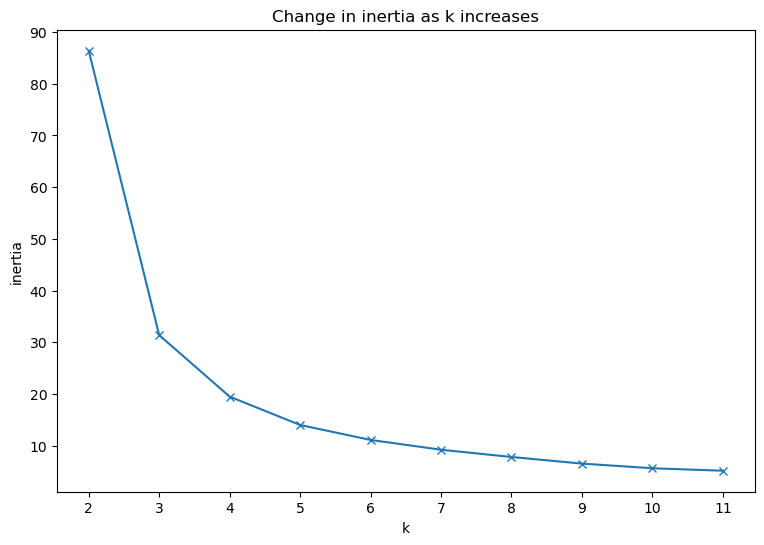

In [15]:
plt.figure(figsize=(9, 6))
pd.Series(
    {k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}
).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

#### This graph seems to show a drop off in inertia around **k=4** so let's look at around there to see what seems best

### Visuals cluster around k=4

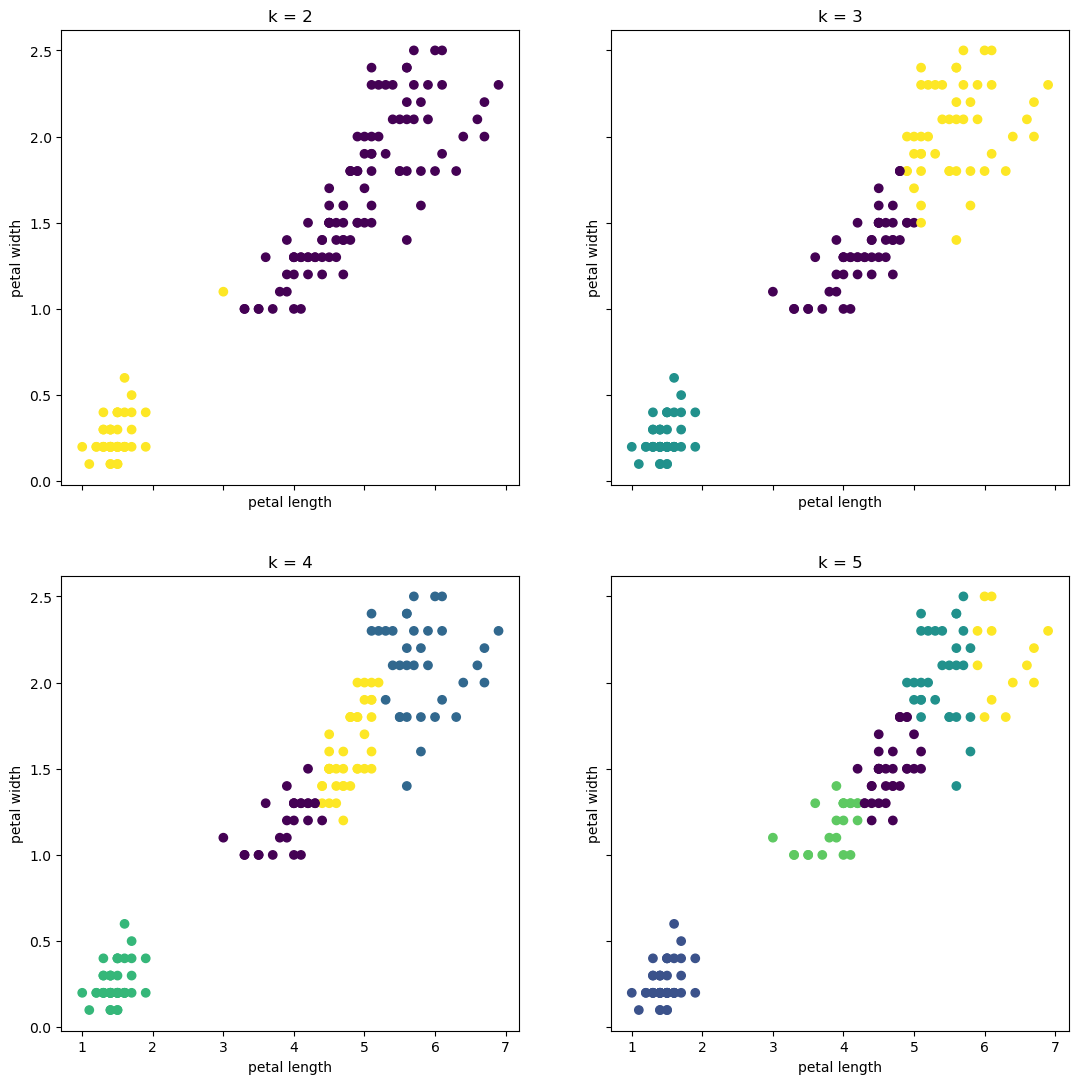

In [16]:
# make a 2 x 2 to observe differences in 
# clusters where k is between 2 and 5
fig, axs = plt.subplots(
    2, 2, figsize=(13, 13), 
    sharex=True, 
    sharey=True)

# for every axis object and k
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

### Clustering on 3 features

In [17]:
X = df[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [19]:
df['three_feature_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,0,0
2,4.9,3.0,1.4,0.2,setosa,0,0
3,4.7,3.2,1.3,0.2,setosa,0,0
4,4.6,3.1,1.5,0.2,setosa,0,0
5,5.0,3.6,1.4,0.2,setosa,0,0


In [20]:
combos = list(itertools.combinations(['petal_length', 'petal_width', 'sepal_length'], 2))

In [21]:
feature_combos = [pair for pair in combos for i in range(0,2)]

In [22]:
# alternatively:
# feature_combos = []
# for combo in combos:
#     for i in [0,1]:
#         feature_combos.append(combo)

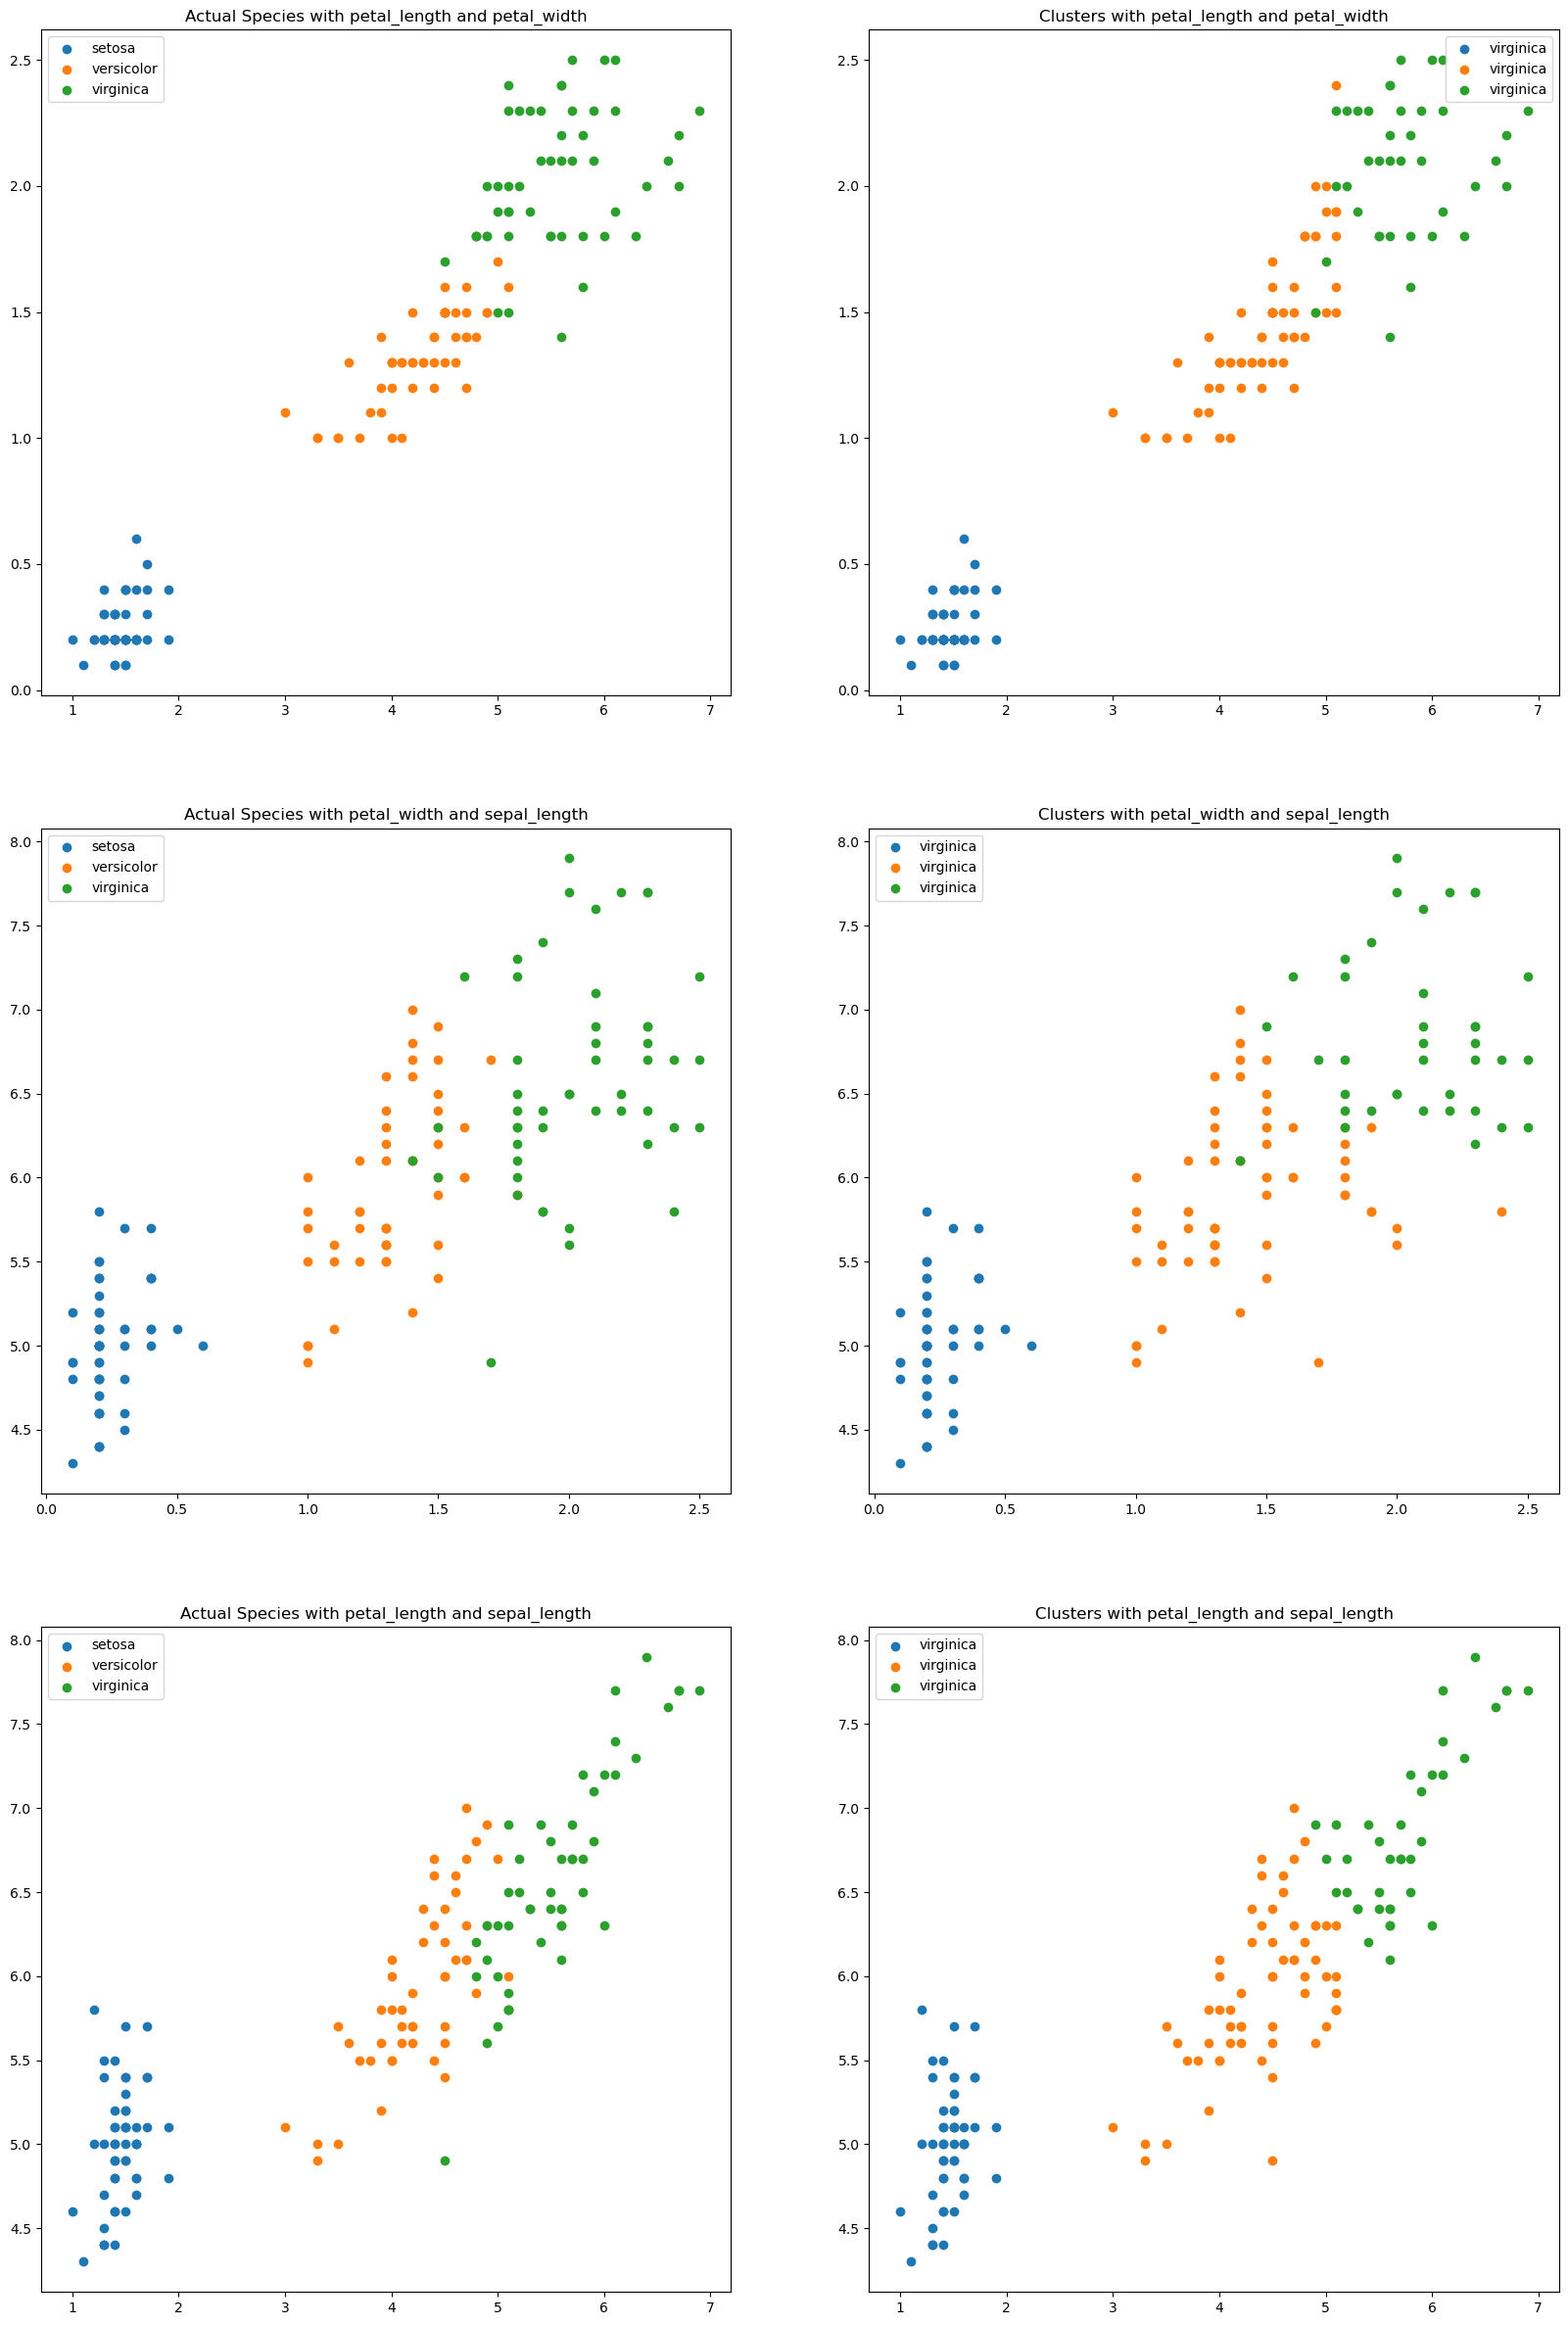

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(20,30))
feature_combos = [['petal_length', 'petal_width'], ['petal_length', 'petal_width'], ['petal_width', 'sepal_length'], ['petal_width', 'sepal_length'],  ['petal_length', 'sepal_length'], ['petal_length', 'sepal_length']]
for i, feat_ax in enumerate(zip(feature_combos,axs.ravel())):
    if i % 2 == 0:
        for species, subset in df.groupby('species'):
            feat_ax[1].scatter(
                subset[feat_ax[0][0]],
                subset[feat_ax[0][1]], 
                label=species)
            feat_ax[1].set_title(f'Actual Species with {feat_ax[0][0]} and {feat_ax[0][1]}')
            feat_ax[1].legend()
    else:
        for cluster_n, subset in df.groupby('three_feature_cluster'):# in df.three_feature_cluster.sort_values().unique():
            feat_ax[1].scatter(
                subset[feat_ax[0][0]],
                subset[feat_ax[0][1]], 
                label=species)
            feat_ax[1].set_title(f'Clusters with {feat_ax[0][0]} and {feat_ax[0][1]}')
            feat_ax[1].legend()
plt.show()

## Clustering the Mall Dataset

### Bring in our modeling data

In [24]:
train, val, test = wrangle.wrangle_mall(summarization=False)
train.head()

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male
customer_id,,,,,,,,
27,Female,45,28,32,0.519231,0.106557,0.294737,0
24,Male,31,25,73,0.250000,0.081967,0.726316,1
40,Female,20,37,75,0.038462,0.180328,0.747368,0
38,Female,30,34,73,0.230769,0.155738,0.726316,0
57,Female,51,44,50,0.634615,0.237705,0.484211,0


### Let's take a quick look at our data

In [25]:
train.head()

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male
customer_id,,,,,,,,
27,Female,45,28,32,0.519231,0.106557,0.294737,0
24,Male,31,25,73,0.250000,0.081967,0.726316,1
40,Female,20,37,75,0.038462,0.180328,0.747368,0
38,Female,30,34,73,0.230769,0.155738,0.726316,0
57,Female,51,44,50,0.634615,0.237705,0.484211,0


In [26]:
X = train[['age', 'annual_income']]
X.head()

,age,annual_income
customer_id,,
27,45,28
24,31,25
40,20,37
38,30,34
57,51,44


### Create our clusters

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 2, 2, 3, 2, 0, 1, 2, 2, 0, 0, 3, 1, 2, 2, 2, 2, 3, 2,
       2, 3, 4, 4, 2, 4, 3, 3, 2, 2, 3, 2, 4, 0, 2, 1, 2, 4, 2, 3, 1, 2,
       1, 4, 3, 2, 3, 4, 3, 1, 3, 3, 2, 3, 4, 0, 4, 1, 1, 4, 3, 1, 4, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 0, 3, 1, 2, 1, 3, 2, 1, 0, 2, 1, 1, 3, 2,
       1, 3, 3, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 4, 4, 1, 4, 0, 1,
       1, 4], dtype=int32)

### Add our clusters onto the training set

In [28]:
train['cluster'] = clusters
train.head()

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male,cluster
customer_id,,,,,,,,,
27,Female,45,28,32,0.519231,0.106557,0.294737,0,1
24,Male,31,25,73,0.250000,0.081967,0.726316,1,1
40,Female,20,37,75,0.038462,0.180328,0.747368,0,1
38,Female,30,34,73,0.230769,0.155738,0.726316,0,1
57,Female,51,44,50,0.634615,0.237705,0.484211,0,2


### Visualize our clusters

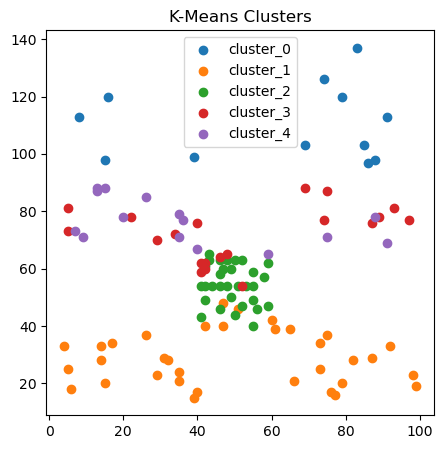

In [29]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

### Use the elbow method to determine if we have the appropriate number of clusters

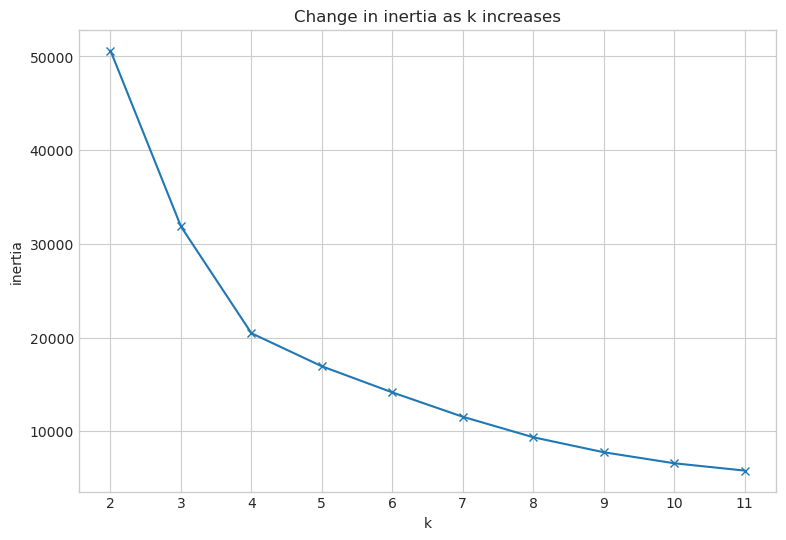

In [30]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### This seem to show the elbow around five so lets check around there

In [31]:
X.columns

Index(['age', 'annual_income'], dtype='object')

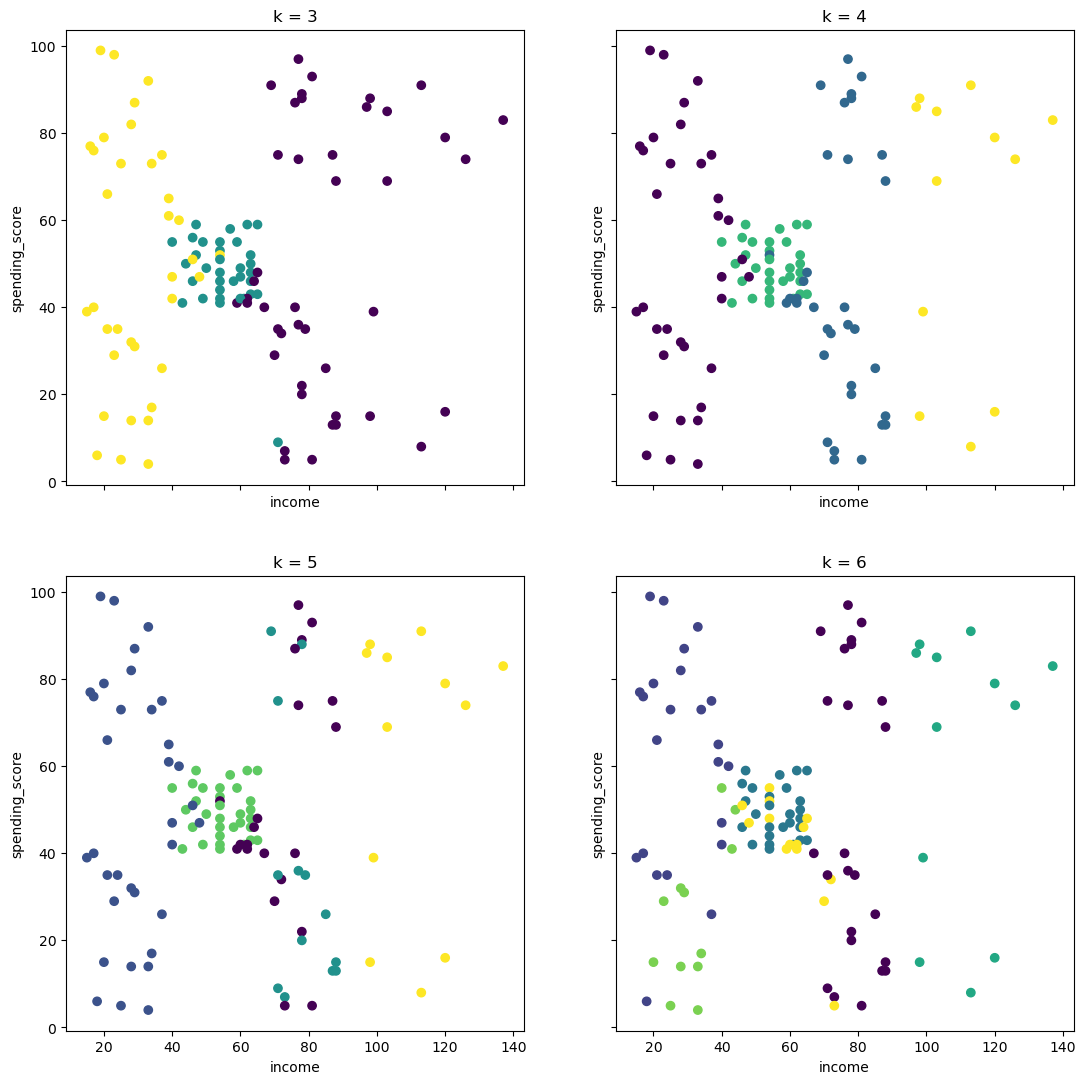

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='income', ylabel='spending_score')

## Clustering the Scaled Mall Dataset (Does scaling make a difference?)

In [33]:
train_scaled = train.drop(columns=['annual_income','age', 'cluster']).copy()

In [34]:
train_scaled.head()

,gender,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male
customer_id,,,,,,
27,Female,32,0.519231,0.106557,0.294737,0
24,Male,73,0.250000,0.081967,0.726316,1
40,Female,75,0.038462,0.180328,0.747368,0
38,Female,73,0.230769,0.155738,0.726316,0
57,Female,50,0.634615,0.237705,0.484211,0


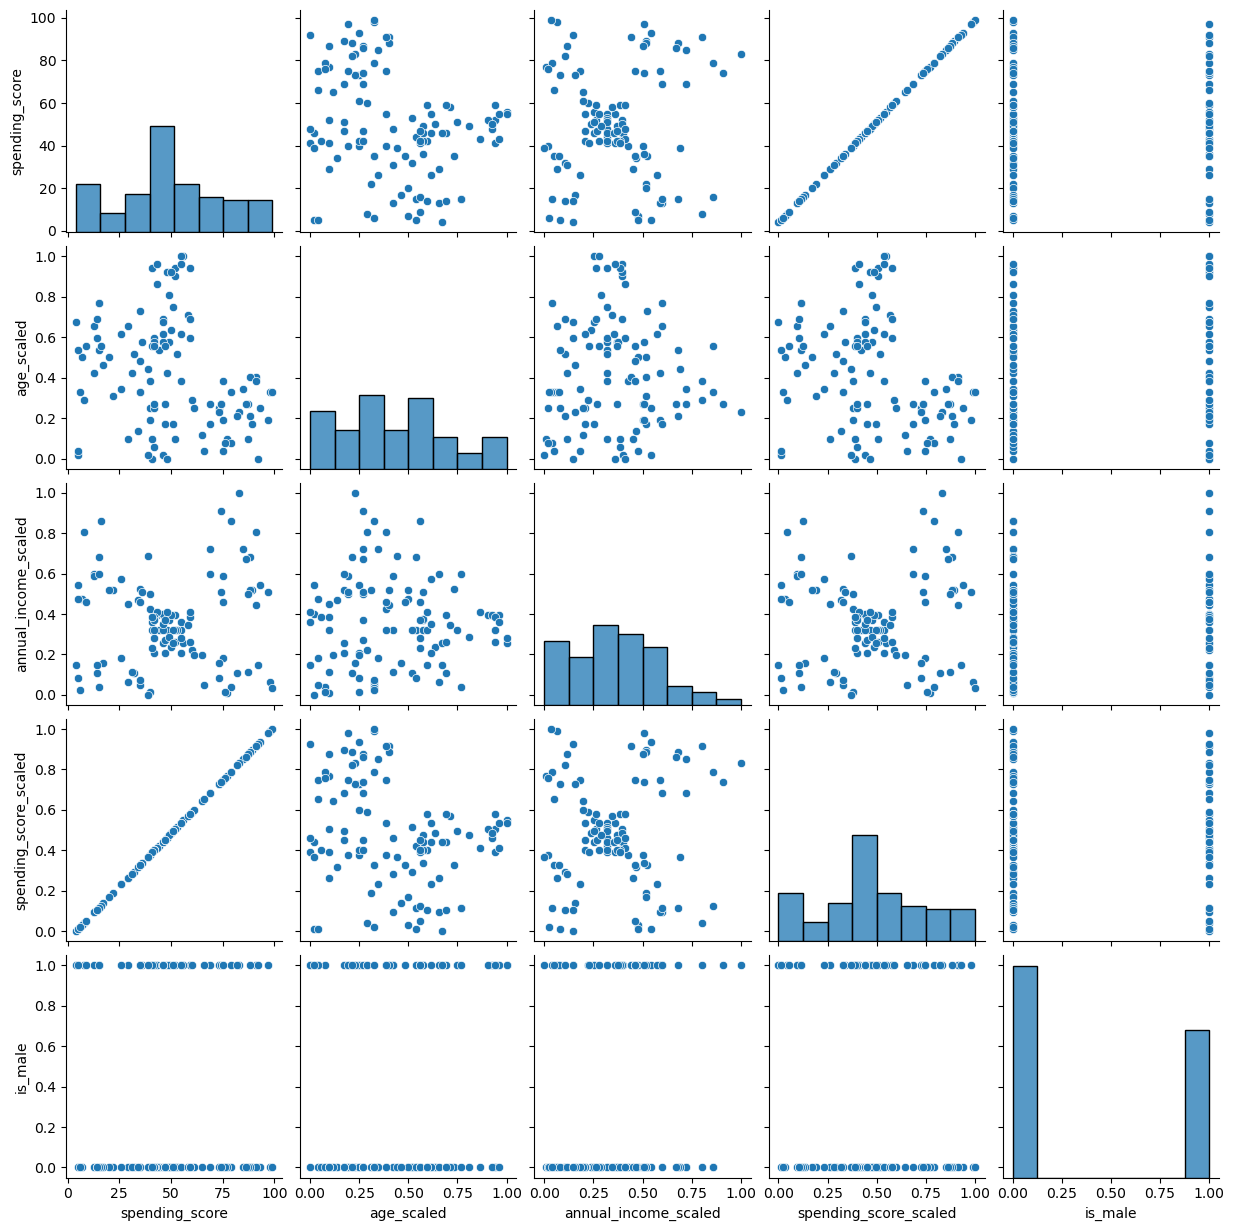

In [35]:
sns.pairplot(train_scaled)

In [36]:
X = train_scaled[['age_scaled', 'annual_income_scaled']]
X.head()

,age_scaled,annual_income_scaled
customer_id,,
27,0.519231,0.106557
24,0.250000,0.081967
40,0.038462,0.180328
38,0.230769,0.155738
57,0.634615,0.237705


In [37]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 4, 4, 4, 0, 2, 1, 0, 3, 4, 2, 0, 3, 3, 1, 4, 2, 2, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 2,
       4, 0, 1, 0, 1, 3, 1, 4, 1, 1, 2, 1, 3, 3, 0, 4, 4, 0, 1, 4, 0, 4,
       2, 2, 4, 4, 4, 4, 2, 0, 3, 1, 4, 0, 4, 1, 2, 4, 3, 0, 0, 0, 1, 0,
       4, 1, 1, 4, 3, 3, 3, 4, 0, 0, 4, 4, 3, 4, 4, 0, 0, 0, 4, 2, 3, 2,
       0, 0], dtype=int32)

In [38]:
train_scaled = train_scaled.assign(cluster=clusters)
# train_scaled.head()

In [39]:
train_scaled = train_scaled.assign(spending_score = train.loc[:,'spending_score'].copy())

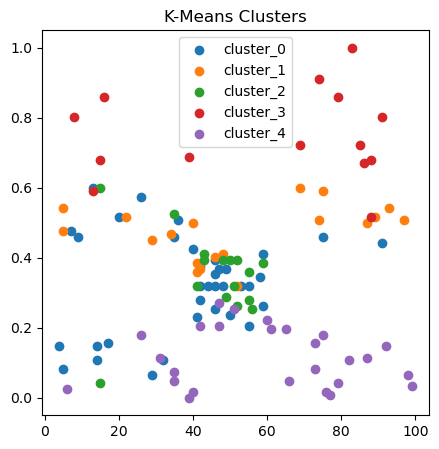

In [40]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income_scaled, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

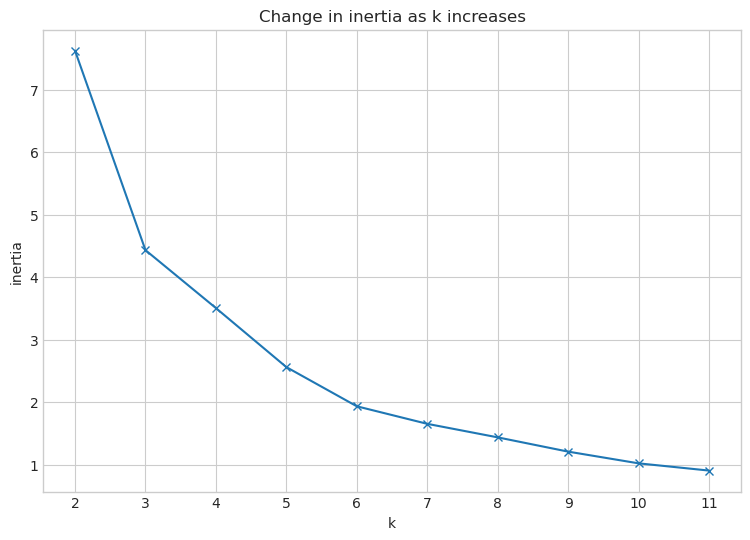

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

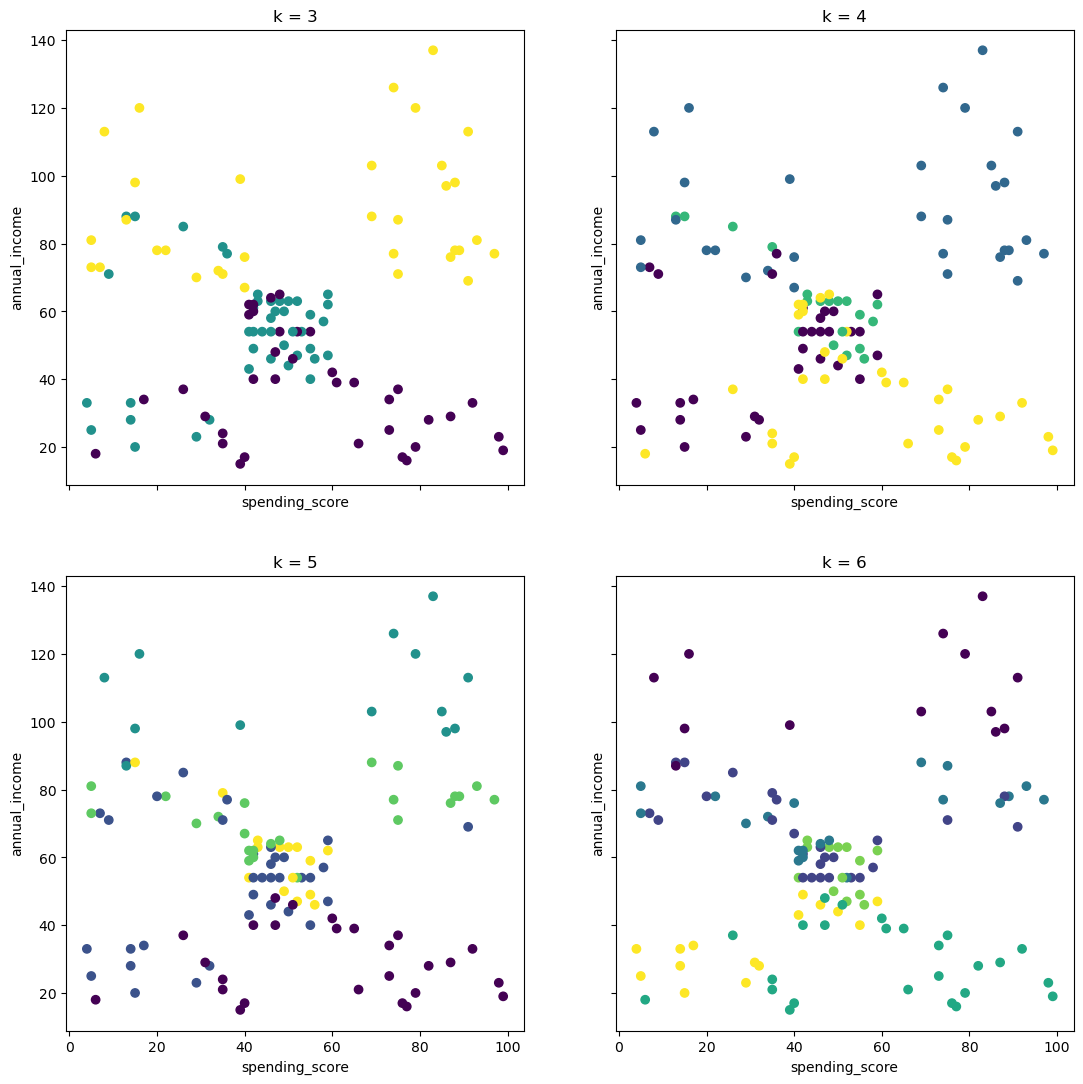

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(train.spending_score, train.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

## Did scaling change our clusters

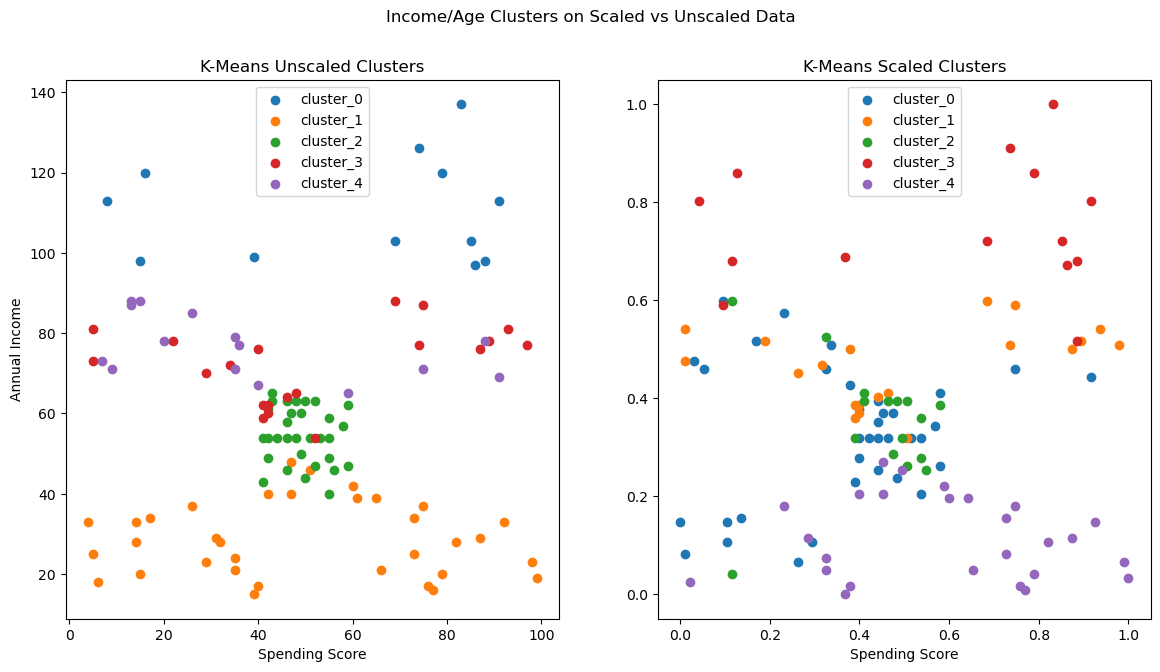

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Income/Age Clusters on Scaled vs Unscaled Data')

for cluster_n in train.cluster.sort_values().unique():
    axs[0].scatter(train[train.cluster == cluster_n].spending_score, 
                train[train.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[0].legend()
axs[0].set(title='K-Means Unscaled Clusters', ylabel='Annual Income', xlabel='Spending Score')

for cluster_n in train_scaled.cluster.sort_values().unique():
    axs[1].scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score_scaled, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income_scaled, 
                label=f'cluster_{cluster_n}'
               )
axs[1].legend()
axs[1].set(title="K-Means Scaled Clusters", xlabel='Spending Score')
plt.show()